In [1]:
import pandas as pd
import numpy as np 
df = pd.read_csv("190203_data_exjobb.csv", encoding='ISO-8859-1')

In [2]:
#dummies = pd.get_dummies(df.FreeText)
dummies = df.iloc[:,0:2].astype(str)

In [3]:
import re
sentence = [None] * df.shape[0]
for i in range(len(sentence)):
    old_sentence = dummies.iloc[i].freetext
    word = list(old_sentence.split())
    words = [None] * len(word)
    for i in range(len(word)):
        words[i] = re.sub(r'\W+', '', word[i].lower().replace('.', ''))
    words1 = [x for x in words if x is not None]
    sentence.append(' '.join(words1))
    sentence1 = [x for x in sentence if x is not None]
df['newFreeText'] = [str(x) for x in sentence1]

In [4]:
from numpy import array
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from numpy import argmax
values = array(sentence1)

In [5]:
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(values)

In [6]:
from scipy.sparse import csr_matrix
onehot_encoder = OneHotEncoder(sparse=False)
integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
onehot_encoded = onehot_encoder.fit_transform(integer_encoded)
ohs_sparse = csr_matrix(onehot_encoded)

C:\Users\spd001\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:368: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


In [7]:
X_train, X_test, y_train, y_test = train_test_split(onehot_encoded, df.pout, test_size=0.3)

In [8]:
model = LogisticRegression(solver='liblinear',class_weight='balanced')
model.fit(X_train,y_train)

C:\Users\spd001\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [9]:
y_pred = model.predict(X_test)
df1=pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})  
df1

,Actual,Predicted
27536,Referral,2A
8492,2A,2A
19015,1B,2A
12649,2B,2A
5052,2A,2A
4941,2B,2A
26884,2A,2A
13644,2B,2A
9206,2A,2A
5793,2B,2A


In [10]:
from sklearn.metrics import classification_report, confusion_matrix  
print(confusion_matrix(y_test, y_pred))  
print(classification_report(y_test, y_pred))
print(model.score(X_test,y_test))

[[   4    0  192    0    0]
 [   1    3 2735    0   13]
 [   0    0 3534    1    7]
 [   0    0  894    0    3]
 [   0    0 1114    0    5]]
              precision    recall  f1-score   support

          1A       0.80      0.02      0.04       196
          1B       1.00      0.00      0.00      2752
          2A       0.42      1.00      0.59      3542
          2B       0.00      0.00      0.00       897
    Referral       0.18      0.00      0.01      1119

   micro avg       0.42      0.42      0.42      8506
   macro avg       0.48      0.20      0.13      8506
weighted avg       0.54      0.42      0.25      8506

0.41688220079943566


In [11]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
vectorizer.fit(sentence1)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [12]:
vector = vectorizer.transform(sentence1)

In [13]:
X_train, X_test, y_train, y_test = train_test_split(vector, df.pout, test_size=0.4)

In [66]:
#model = LogisticRegression(solver='liblinear',class_weight='balanced')
model=LogisticRegression()
model.fit(X_train,y_train)

C:\Users\spd001\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\spd001\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [15]:
y_pred = model.predict(X_test)
df1=pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})  
df1

,Actual,Predicted
5550,Referral,2A
9980,2A,1B
20563,2A,2A
23445,2B,2B
22947,1B,1B
8244,1B,1B
22536,2A,2B
27555,1B,2A
11940,2A,2A
18231,2A,2A


In [16]:
print(confusion_matrix(y_test, y_pred))  
print(classification_report(y_test, y_pred))
print(model.score(X_test,y_test))

[[  64  166   31    0    7]
 [  66 2551 1012   36   86]
 [   8  969 3190  230  292]
 [   0  103  714  239  115]
 [   0  211  590   88  573]]
              precision    recall  f1-score   support

          1A       0.46      0.24      0.32       268
          1B       0.64      0.68      0.66      3751
          2A       0.58      0.68      0.62      4689
          2B       0.40      0.20      0.27      1171
    Referral       0.53      0.39      0.45      1462

   micro avg       0.58      0.58      0.58     11341
   macro avg       0.52      0.44      0.46     11341
weighted avg       0.57      0.58      0.57     11341

0.5834582488316727


In [72]:
from sklearn.feature_extraction.text import TfidfVectorizer
v = TfidfVectorizer()
x = v.fit_transform(sentence1)
x.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [73]:
X_train, X_test, y_train, y_test = train_test_split(x, df.pout, test_size=0.1)

In [74]:
y_pred = model.predict(X_test)
df1=pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})  
df1 

,Actual,Predicted
59,2A,2A
14342,Referral,Referral
1601,Referral,Referral
10871,2A,2A
3231,1B,2A
16378,1B,2A
1444,Referral,2A
4952,2A,2A
20168,2A,2A
9038,2A,2A


In [76]:
print(confusion_matrix(y_test, y_pred))  
print(classification_report(y_test, y_pred))
print(model.score(X_train,y_train))

[[ 21  53   5   0   1]
 [  4 717 193   0   5]
 [  0 178 918   7  15]
 [  0  20 227  44  16]
 [  0  40 199   7 166]]
              precision    recall  f1-score   support

          1A       0.84      0.26      0.40        80
          1B       0.71      0.78      0.74       919
          2A       0.60      0.82      0.69      1118
          2B       0.76      0.14      0.24       307
    Referral       0.82      0.40      0.54       412

   micro avg       0.66      0.66      0.66      2836
   macro avg       0.74      0.48      0.52      2836
weighted avg       0.69      0.66      0.63      2836

0.6721664837748863


In [78]:
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
clf.fit(x.toarray(), df.pout)

MemoryError: 

In [ ]:
y_pred = clf.predict(X_test.toarray())

In [23]:
clf.score(X_test.toarray(),y_test)

0.5843400052905388

In [24]:
df4=pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})  
df4

,Actual,Predicted
23805,2A,2A
26435,Referral,Referral
3442,1B,1B
20344,1B,1B
2620,1B,2B
20837,1B,2B
27003,2A,2B
23502,2A,2A
13032,2A,2A
10548,Referral,2B


In [25]:
print(confusion_matrix(y_test, y_pred))  
print(classification_report(y_test, y_pred))

[[ 291    0    0    0    0]
 [ 405 2038    0  854  375]
 [ 206  505 2159 1461  418]
 [  24    0    0 1091    0]
 [  71    0    0  395 1048]]
              precision    recall  f1-score   support

          1A       0.29      1.00      0.45       291
          1B       0.80      0.56      0.66      3672
          2A       1.00      0.45      0.63      4749
          2B       0.29      0.98      0.44      1115
    Referral       0.57      0.69      0.62      1514

   micro avg       0.58      0.58      0.58     11341
   macro avg       0.59      0.74      0.56     11341
weighted avg       0.79      0.58      0.61     11341



In [26]:
from sklearn import svm
clf = svm.SVC(gamma='scale')

In [31]:
y_pred= clf.fit(X_train, y_train)

In [33]:
y_pred = clf.predict(X_test)
df4=pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})  
df4

,Actual,Predicted
23676,2A,2A
28141,Referral,2A
28195,Referral,2A
11979,2A,2A
1322,1B,2A
16056,2A,2A
11828,1B,2A
4195,Referral,2A
7858,2A,2A
9366,2A,2A


In [34]:
print(confusion_matrix(y_test, y_pred))  
print(classification_report(y_test, y_pred))
print(clf.score(X_test,y_test))

[[   0    1  193    0    0]
 [   0   68 2754    0    0]
 [   0    1 3507    0    0]
 [   0    1  829    0    0]
 [   0    1 1151    0    0]]
              precision    recall  f1-score   support

          1A       0.00      0.00      0.00       194
          1B       0.94      0.02      0.05      2822
          2A       0.42      1.00      0.59      3508
          2B       0.00      0.00      0.00       830
    Referral       0.00      0.00      0.00      1152

   micro avg       0.42      0.42      0.42      8506
   macro avg       0.27      0.20      0.13      8506
weighted avg       0.48      0.42      0.26      8506

0.4202915588996003


In [40]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics  
k_range=range(1,30)
scores={}
scores_list=[]

In [41]:
for k in k_range:
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    y_pred=knn.predict(X_test)
    scores[k]=metrics.accuracy_score(y_test,y_pred)
    scores_list.append(metrics.accuracy_score(y_test,y_pred))

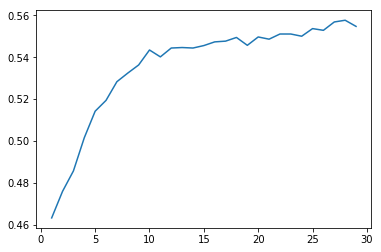

In [42]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(k_range,scores_list)

In [55]:
X_train, X_test, y_train, y_test = train_test_split(x, df.hosp_ed, test_size=0.2)
from sklearn.tree import DecisionTreeRegressor  
regressor = DecisionTreeRegressor()  
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
df3=pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})  
df3 

,Actual,Predicted
25990,1,1.0
9390,1,0.0
12605,1,1.0
7337,0,1.0
19131,1,1.0
13111,1,1.0
12433,1,1.0
6859,1,1.0
7203,1,1.0
15005,0,0.0


In [56]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print(y_pred==y_test)
print(np.mean(y_pred))
print(np.mean(y_test))

Mean Absolute Error: 0.18141376624130318
Mean Squared Error: 0.18085619380781537
25990     True
9390     False
12605     True
7337     False
19131     True
13111     True
12433     True
6859      True
7203      True
15005     True
18322    False
13732     True
10250     True
2924      True
13241     True
5354     False
12806     True
14068    False
20612     True
21830     True
3564      True
3247      True
22029    False
15441    False
19312     True
21600    False
24132     True
14380     True
10004     True
22978     True
         ...  
26692     True
24669     True
2531      True
14067     True
1331      True
23930    False
14631    False
9491      True
8302      True
6716      True
14902     True
24254     True
3089      True
26566     True
23062    False
19472     True
7993      True
7011      True
26545     True
21342     True
2901      True
25053    False
17373     True
3587      True
27317    False
3021      True
22616     True
2506     False
26845     True
4696      True
Name

In [57]:
words3=[]
sentence = [None] * df.shape[0]
for i in range(len(sentence)):
    old_sentence = dummies.iloc[i].freetext
    word = list(old_sentence.split())
    words = [None] * len(word)
    for i in range(len(word)):
        words[i] = re.sub(r'\W+', '', word[i].lower().replace('.', ''))
    words1 = [x for x in words if x is not None]
    sentence.append(' '.join(words1))
    sentence1 = [x for x in sentence if x is not None]
    words3.append(sentence1)

In [59]:
import gensim
from gensim.models import Word2Vec
from gensim.models import word2vec
from gensim.models import Phrases
import logging
model = Word2Vec(words3, min_count=1)

In [62]:
X_train, X_test, y_train, y_test = train_test_split(model.wv.vocab, df.pout, test_size=0.3)

ValueError: Found input variables with inconsistent numbers of samples: [28220, 28352]